<div align="right">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/wisaaco/TallerPythonFEE/blob/main/lessons/5/5_PandasVisualitzacions.ipynb)


</div>

### Activitats d'escalfament.

In [2]:
import pandas as pd
import numpy as np
# GENERARAMOS UNOS DATOS FICTICIOS!!!
data = {
    'pais': ['Argentina', 'Brasil', 'Canadá', 'China', 'Alemania', 'India', 'Japón', 'México', 'Nigeria', 'Rusia'],
    'continente': ['América del Sur', 'América del Sur', 'América del Norte', 'Asia', 'Europa', 'Asia', 'Asia', 'América del Norte', 'África', 'Europa'],
    'poblacion': [45376763, 213823154, 38131104, 1395380000, 83149300, 1380004385, 126150000, 130222815, 206139587, 144096812],
    'pib': [637.717, 2055.51, 1610.07, 16624.05, 4644.83, 2697.22, 4930.61, 1079.24, 514.049, 1630.03],
    'contaminacion': [12.40, 9.69, 15.04, 7.57, 9.35, 17.70, 9.70, 14.87, 6.66, 11.14]
}

df = pd.DataFrame(data)

In [3]:
#6.0 ¿Cual es la contaminación media por continente?


,contaminacion
continente,
América del Norte,14.955000
América del Sur,11.045000
Asia,11.656667
Europa,10.245000
África,6.660000


In [13]:
#6.1 ¿Que continente tiene mayor población?


,poblacion
continente,
Asia,2901534385
América del Sur,259199917
Europa,227246112
África,206139587
América del Norte,168353919


In [17]:
# Algunos de esos paises están la ONU
miembros_onu = ['Argentina', 'Brasil',  'China', 'Alemania', 'India', 'Japón' ] #Datos ficticios!
df['miembro_onu'] = df['pais'].apply(lambda x: 'Sí' if x in miembros_onu else 'No')
print(df)

        pais         continente   poblacion        pib  contaminacion  \
0  Argentina    América del Sur    45376763    637.717          12.40   
1     Brasil    América del Sur   213823154   2055.510           9.69   
2     Canadá  América del Norte    38131104   1610.070          15.04   
3      China               Asia  1395380000  16624.050           7.57   
4   Alemania             Europa    83149300   4644.830           9.35   
5      India               Asia  1380004385   2697.220          17.70   
6      Japón               Asia   126150000   4930.610           9.70   
7     México  América del Norte   130222815   1079.240          14.87   
8    Nigeria             África   206139587    514.049           6.66   
9      Rusia             Europa   144096812   1630.030          11.14   

  miembro_onu  
0          Sí  
1          Sí  
2          No  
3          Sí  
4          Sí  
5          Sí  
6          Sí  
7          No  
8          No  
9          No  


In [20]:
##6.2 ¿Cual es el PIB medio por continente y por membresía en la ONU?


pib
continente        miembro_onu           
América del Norte No           1344.6550
América del Sur   Sí           1346.6135
Asia              Sí           8083.9600
Europa            No           1630.0300
                  Sí           4644.8300
África            No            514.0490

# 6 - Visualitzacions

Pandas inclou una gran quantitat d'utilitats per a facilitar la representació gràfica d'un dataframe i de les seves sèries usant la llibreria Matplotlib.
[Veure documentació](https://pandas.pydata.org/docs/user_guide/visualization.html).

La visualització directa amb Pandas és simplement fantàstica, a causa del seu fàcil ús, per a interpretacions i informes varis. Encara que, no és prou versàtil per a controlar diversos "criteris tècnics", en aquest cas cal complementar-la amb matplotlib. Els gràfics de Pandes són una abstracció d'aquesta llibreria.

D'altra banda, veurem alguns exemples de visualització amb una altra llibreria anomenada [Seaborn](https://seaborn.pydata.org/).

Ara com ara, ens limitarem a parlar sobre els tipus bàsics de visualització i dels elements necessaris per facilitar la interpretació ((títols, tics als eixos, llegendes, selecció de colors, etc.)

- Línies
- Barres
- Histogrames i *Boxplots
- Scatter plots
 

## Plot method


In [1]:
import numpy as np
import pandas as pd

# Generació de dades

np.random.seed(1)
samples = 50

df = pd.DataFrame({ 
    "temperatura":np.random.randint(low=-10,high=50,size=samples),
    "vent":np.random.choice(["N","S","E","W"],size=samples)})

df.head()

,temperatura,vent
0,27,E
1,33,S
2,2,N
3,-2,E
4,-1,W


<AxesSubplot:>

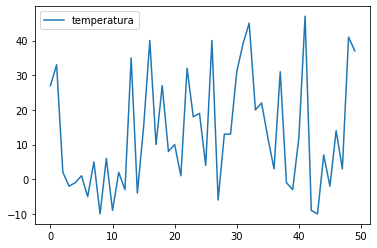

In [3]:
df.plot()

<AxesSubplot:>

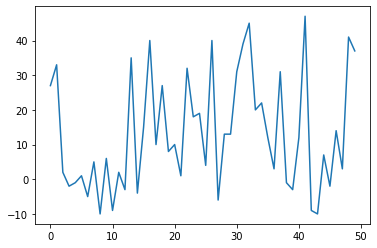

In [5]:
df.temperatura.plot() # Quines difèrencies a les dos gràfiques n'hi ha entre un dataframe i una sèrie?

In [6]:
df.vent.plot()

TypeError: no numeric data to plot

In [7]:
df.groupby(["vent"]).size()

vent
E    11
N    12
S    13
W    14
dtype: int64

<AxesSubplot:xlabel='vent'>

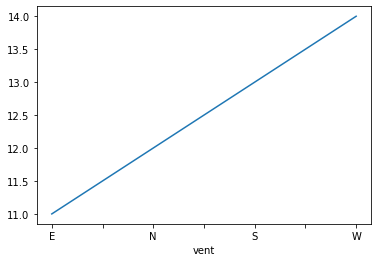

In [9]:
df.groupby(["vent"]).size().plot() #No té sentit el tipus .plot() per aquestes dades

<AxesSubplot:xlabel='vent'>

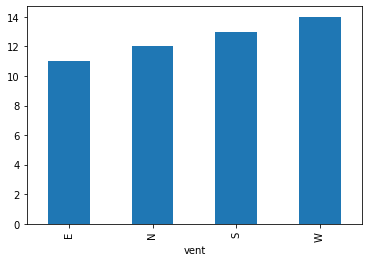

In [10]:
df.groupby(["vent"]).size().plot(kind="bar") #millor un de barres

## Matplotlib

Pandas internament utilitza la llibreria on es defineixen els components d'un gràfic. Es diu `Matplotlib`

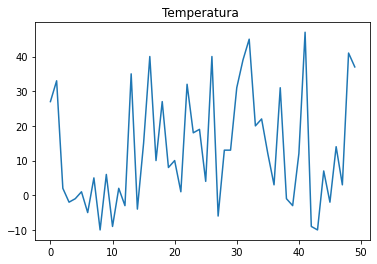

In [18]:
import matplotlib.pyplot as plt # !


plt.plot(df.temperatura)
plt.title("Temperatura ")
plt.show()

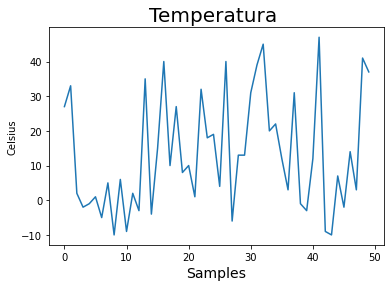

In [19]:
import matplotlib.pyplot as plot

fig, ax = plot.subplots() # Definició forma

ax.plot(df.temperatura) # Insercció de dades

plt.title("Temperatura ", fontsize=20) # Maquetació
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Celsius')


plt.savefig('data/test.jpg',dpi=100) # guardat
plt.show() # Visualització 

In [20]:
# Vent sèrie
tipusVent  = df.groupby(["vent"]).size()
print(tipusVent)

vent
E    11
N    12
S    13
W    14
dtype: int64


<BarContainer object of 4 artists>

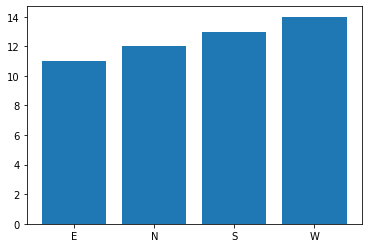

In [21]:

x = tipusVent.index
y = tipusVent.values

fig, ax = plot.subplots() # Definició forma
ax.bar(x,y)

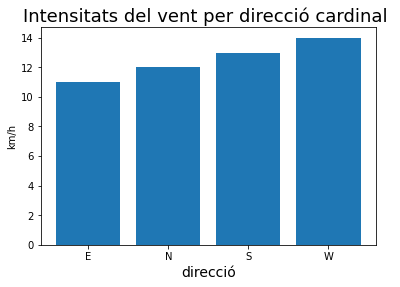

In [22]:
fig, ax = plot.subplots() # Definició forma

ax.bar(x,y) # insercció de dades

plt.title("Intensitats del vent per direcció cardinal ", fontsize=18) # Maquetació
plt.xlabel('direcció', fontsize=14)
plt.ylabel('km/h')


plt.savefig('data/test.jpg',dpi=100) # Visualització i/o guardat
plt.show()


## Quines diferències trobes amb el bar.plot fet amb pandas?

In [24]:
y

array([11, 12, 13, 14])

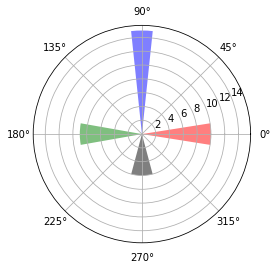

In [44]:
import numpy as np
import matplotlib.pyplot as plt
y = np.array([10,15,9,6])
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html
N = 4 #direccions
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = y
width = np.pi / y
colors = ["red","blue","green","black"]

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()
# Una altra llibrería: https://plotly.com/python/polar-chart/

## Tipus de visualitzacions

### Barres

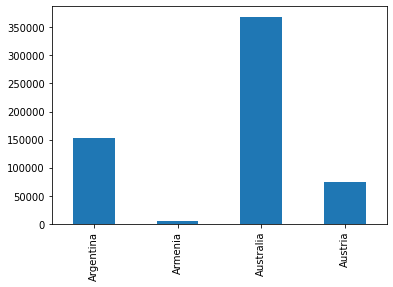

In [45]:
df= pd.read_csv("data/WHO.csv")

co2 = df["Total_CO2_emissions"]
ticks_labels = df["Country"][6:10].values

ax = co2[6:10].plot(kind="bar") # un plot retorna el component AX
ax.set_xticklabels(ticks_labels)
plt.show()

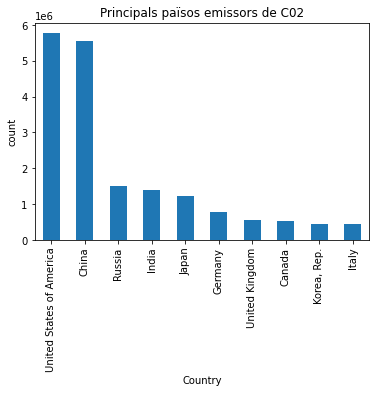

In [48]:
co2 = df["Total_CO2_emissions"].sort_values(ascending=False).head(10) 

dateSelect = df.loc[co2.index] # Noms
co2.index = dateSelect["Country"] 

ax = co2.plot(kind="bar") 
ax.set_ylabel("count")
plt.title("Principals països emissors de C02")
plt.show()

# Com podem canviar les etiquetes de los eixos?


### Histogrames

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html


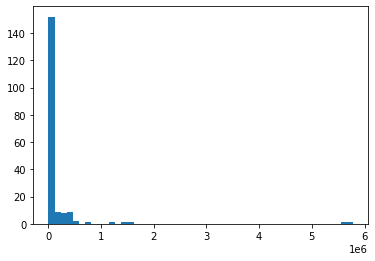

In [57]:
co2 = df["Total_CO2_emissions"]

fig, ax = plot.subplots() # Definició forma

ax.hist(co2.values,bins=50) # insercció de dades
plt.show()


### Boxplots

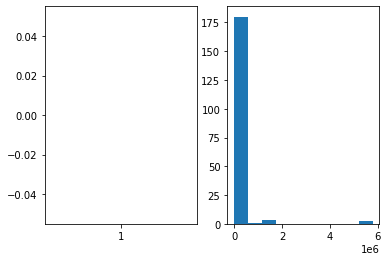

In [65]:
co2 = df["Total_CO2_emissions"]

fig, ax = plt.subplots(ncols=2)

ax[0].boxplot(co2.values*1000)
ax[1].hist(co2)

plt.show()

# On estan els valors ?

In [66]:
co2.head(10) # Quins valors tenim?

0       692.50
1      3499.12
2    137535.56
3          NaN
4      8991.46
5       421.36
6    152711.86
7      4345.50
8    368858.53
9     73602.43
Name: Total_CO2_emissions, dtype: float64

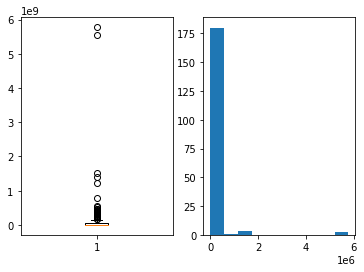

In [64]:
co2.dropna(inplace=True) ## VALORS DESCONEGUTS => NaN (NotAtNumber)

fig, ax = plt.subplots(ncols=2)

ax[0].boxplot(co2.values*1000)
ax[1].hist(co2)

plt.show()

### Lineals

In [75]:
import numpy as np

xs = np.random.randn(3, 10000)
print(xs.shape)
print(xs[:5])

(3, 10000)
[[-0.46183615  0.3178843   0.62683285 ... -1.27423201  1.67868375
  -0.33164508]
 [-0.53968937 -0.54150265  0.30693369 ...  0.57017049  0.38711088
  -1.42256073]
 [ 0.29354989 -0.34311475 -1.01271945 ...  0.49504346  0.83391768
  -0.31889334]]


In [76]:
bms = xs.cumsum(axis=1)
print(bms.shape)
print(bms[:5])

(3, 10000)
[[-4.61836153e-01 -1.43951857e-01  4.82880998e-01 ...  4.76108041e+01
   4.92894879e+01  4.89578428e+01]
 [-5.39689373e-01 -1.08119203e+00 -7.74258341e-01 ...  1.26704022e+02
   1.27091133e+02  1.25668572e+02]
 [ 2.93549889e-01 -4.95648581e-02 -1.06228431e+00 ...  8.45321035e+01
   8.53660212e+01  8.50471279e+01]]


Text(0.5, 1.0, 'Random motion')

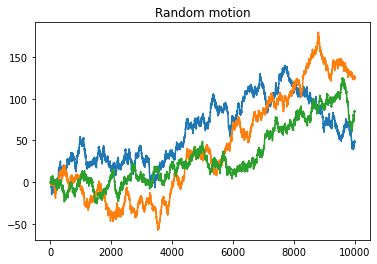

In [79]:
fig, ax = plt.subplots()
for bm in bms:
    ax.plot(bm)
plt.title("Random motion")    

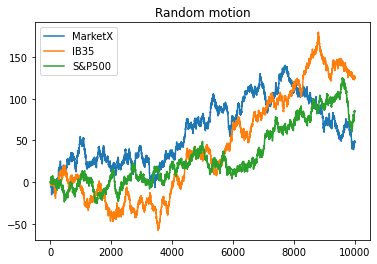

In [84]:
labels = ["MarketX","IB35","S&P500"]
fig, ax = plt.subplots()
for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e])
plt.title("Random market motion")
plt.legend()    
plt.show()

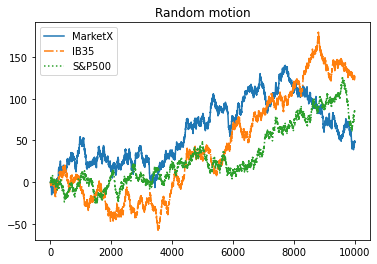

In [86]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

labels = ["MarketX","IB35","S&P500"]
lstyle = ["solid","dashdot","dotted"]
fig, ax = plt.subplots()
for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e],linestyle=lstyle[e])
plt.title("Random market motion")
plt.legend()    
plt.show()




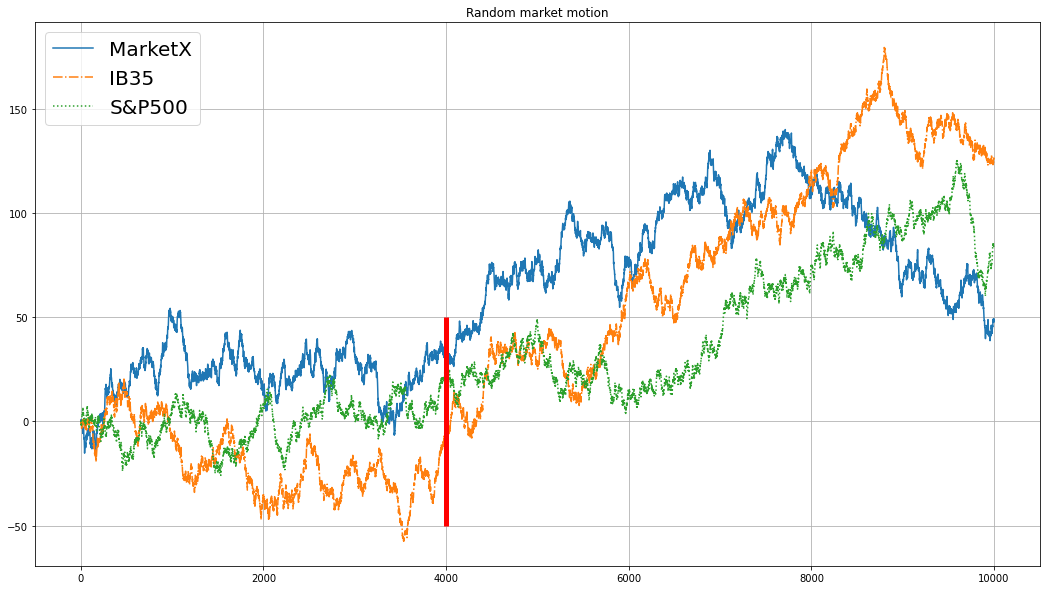

In [98]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html


labels = ["MarketX","IB35","S&P500"]
lstyle = ["solid","dashdot","dotted"]
fig, ax = plt.subplots(figsize=(18,10)) #diferent mida
for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e],linestyle=lstyle[e])

ax.vlines(x=4000,ymin=-50,ymax=50,color="red",linewidth=5) 
plt.title("Random market motion")
plt.legend(prop={'size': 20})    # Alerta! Prova de llevar aquesta "prop" (propietat)
plt.grid()  # grid # Alerta! el Grid moltes vegades no cal, depèn de la interpretació
plt.show()

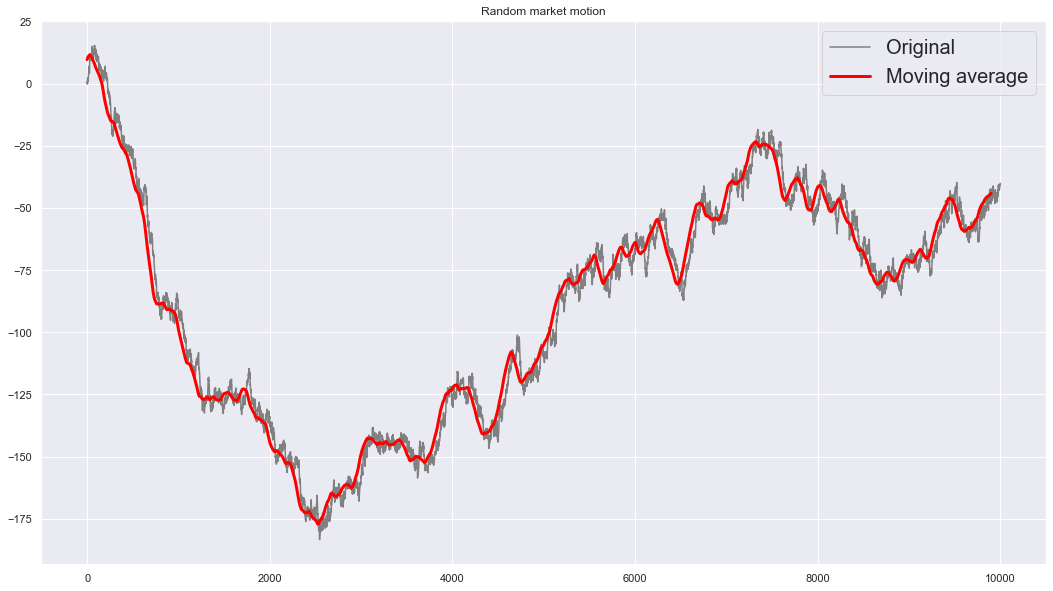

In [160]:
# Podem millorar certes visualitzacions de sèries fent filtratge de les dades
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

xs = np.random.randn(10000)
bms = xs.cumsum()
bmsMA = moving_average(bms,100)


fig, ax = plt.subplots(figsize=(18,10)) #diferent mida
ax.plot(bms, label="Original",color="gray")
ax.plot(bmsMA, label="Moving average",color="red",linewidth=3)
plt.title("Random market motion")
plt.legend(prop={'size': 20})   
plt.show()



## Llibrería Seaborn


https://seaborn.pydata.org/

In [114]:
%pip install seaborn


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [144]:
import seaborn as sns

dfwho = pd.read_csv("data/WHO.csv",usecols=[0,1,2,185,67,4])
dfwho.columns =['Country', 'CountryID', 'Continent', 'LiteracyRate',
       'TotalExpenditureHealth',
       'CO2_emissions']

continents = {1:"Africa",2:"Europa",3:"Africa",4:"North America",7:"Asia",6:"Asia",5:"South America"}
dfwho.replace({"Continent": continents},inplace=True)              
              


print(dfwho.columns)
print(dfwho.shape)
print(dfwho.head())


Index(['Country', 'CountryID', 'Continent', 'LiteracyRate',
       'TotalExpenditureHealth', 'CO2_emissions'],
      dtype='object')
(202, 6)
       Country  CountryID Continent  LiteracyRate  TotalExpenditureHealth  \
0  Afghanistan          1    Africa          28.0                     5.4   
1      Albania          2    Europa          98.7                     6.2   
2      Algeria          3    Africa          69.9                     3.6   
3      Andorra          4    Europa           NaN                     6.3   
4       Angola          5    Africa          67.4                     2.7   

   CO2_emissions  
0           0.02  
1           0.98  
2           4.23  
3            NaN  
4           0.76  


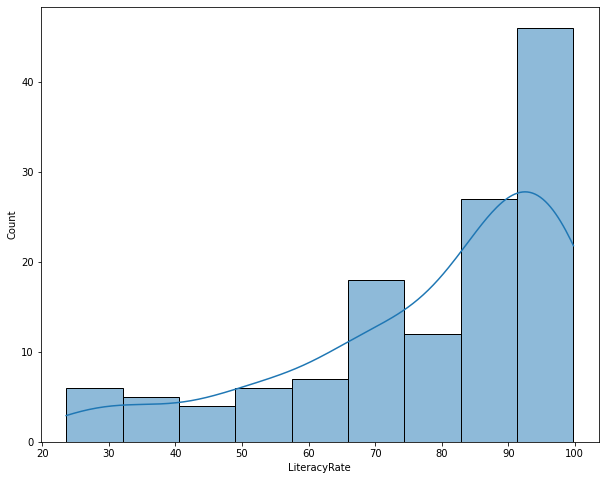

In [149]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(dfwho,x="LiteracyRate", kde=True)
plt.show()

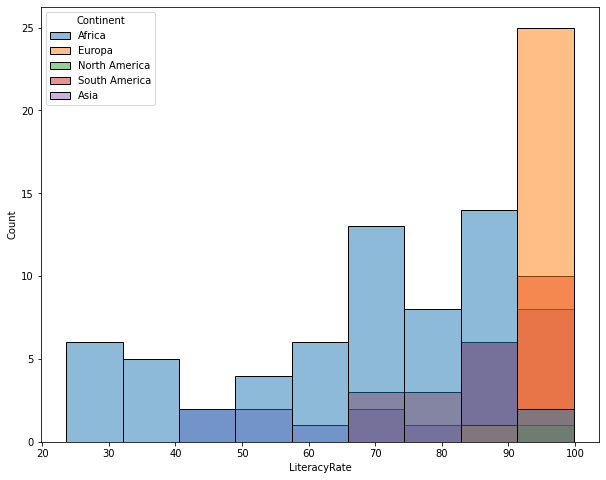

In [148]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(dfwho,x="LiteracyRate", hue="Continent")
plt.show()

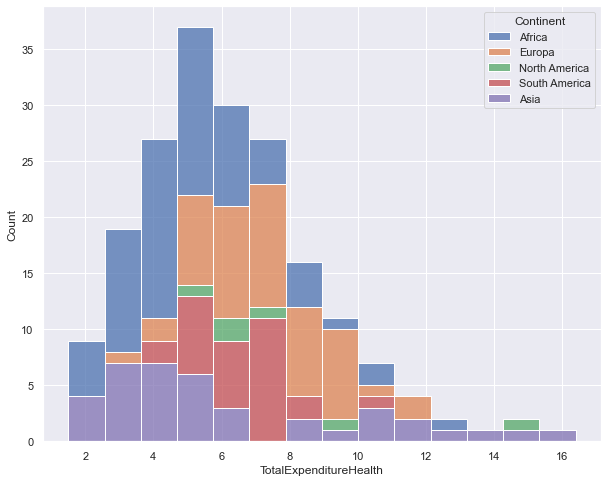

In [162]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(dfwho,x="TotalExpenditureHealth", hue="Continent", multiple="stack")
plt.show()

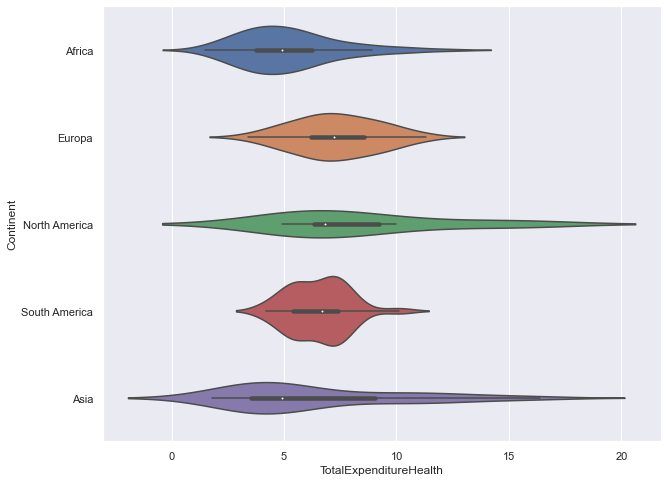

In [161]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html

fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x=dfwho["TotalExpenditureHealth"],y=dfwho.Continent)
plt.show()



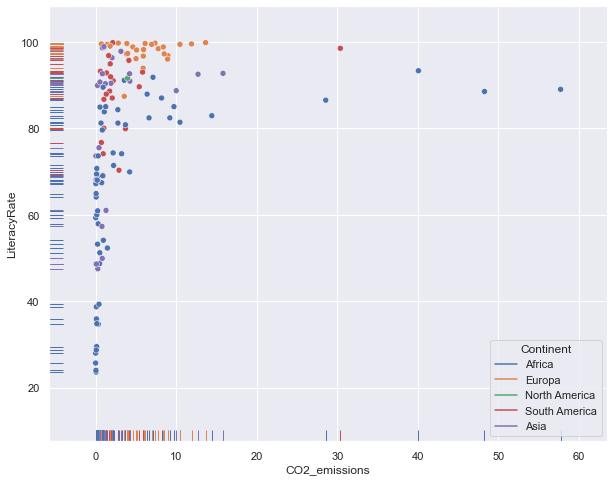

In [159]:
# https://seaborn.pydata.org/generated/seaborn.rugplot.html
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=dfwho, x="CO2_emissions", y="LiteracyRate",hue="Continent")
sns.rugplot(data=dfwho, x="CO2_emissions", y="LiteracyRate",hue="Continent")
plt.show()

## Africa valors?


## Activitats

A) Amb el fitxer who.csv,
- Podries mostrar els 10 països més poblats ("Population (in thousands) total")? <br/>
- I els 10 menys poblats? <br/>

Nota: Hi ha paises on es desconeix la contaminació que generin (valors NaN) i afectaran la visualització.


In [ ]:
#TODO

B) Representa en un gràfic de barres el creixement de població (*Population annual growth rate (%)) dels països del top 10 més poblats.*

In [ ]:
#TODO

C) Representa amb un boxplot la contaminació (CO2) d'Europa (codi continent: 2)


In [ ]:
#TODO

D) Amb el fitxer 4/data/data_groups.csv, visualitza la distribució de ciutats i punts de candidats

In [ ]:
#TODO

E) Amb el fitxer 4/data/data_groups.csv, visualitza la distribució de ciutats, punts de candidats i sexe.

In [164]:
#TODO

## Activitat 5 del homework

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC_BY_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/) <br/>
Isaac Lera and Gabriel Moya <br/>
Universitat de les Illes Balears <br/>
isaac.lera@uib.edu, gabriel.moya@uib.edu